### Initialization

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
new_path = '/content/drive/My Drive/IEOR 142A Group Project'
os.chdir(new_path)
print(os.getcwd())

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/IEOR 142A Group Project'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Datasets

In [ ]:
flight_delay = pd.read_csv("Flight_delay.csv")
print(flight_delay.describe())
flight_delay.info()
print(flight_delay.shape)
flight_delay.head()

           DayOfWeek        DepTime        ArrTime     CRSArrTime  \
count  484551.000000  484551.000000  484551.000000  484551.000000   
mean        3.991605    1564.477865    1617.784438    1652.129929   
std         1.971466     452.235219     583.637660     466.096216   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000    1234.000000    1327.000000    1339.000000   
50%         4.000000    1620.000000    1737.000000    1723.000000   
75%         6.000000    1928.000000    2049.000000    2025.000000   
max         7.000000    2400.000000    2400.000000    2359.000000   

           FlightNum  ActualElapsedTime  CRSElapsedTime        AirTime  \
count  484551.000000      484551.000000   484551.000000  484551.000000   
mean     2139.207386         134.810422      131.400761     108.877134   
std      1812.677071          74.070374       71.542531      70.113513   
min         1.000000          15.000000      -21.000000       0.000000   
25%     

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,...,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,...,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,...,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,...,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,...,4,9,0,N,0,0,0,0,0,16


In [ ]:
bay_weather = pd.read_csv("Bay Area Airport Weather Data 2019.csv")
print(bay_weather.describe())
bay_weather.info()
print(bay_weather.shape)
bay_weather.head()

              AWND         PGTM         PRCP   SNOW   SNWD        TAVG  \
count  1094.000000    98.000000  1095.000000  307.0  359.0  365.000000   
mean      8.671700  1476.857143     0.054420    0.0    0.0   58.654795   
std       3.985422   355.556106     0.171066    0.0    0.0    6.334647   
min       1.340000     2.000000     0.000000    0.0    0.0   45.000000   
25%       5.820000  1359.000000     0.000000    0.0    0.0   55.000000   
50%       8.050000  1539.000000     0.000000    0.0    0.0   58.000000   
75%      10.740000  1653.000000     0.000000    0.0    0.0   63.000000   
max      25.050000  2332.000000     1.640000    0.0    0.0   79.000000   

              TMAX         TMIN         WDF2         WDF5         WSF2  \
count  1092.000000  1094.000000  1095.000000  1088.000000  1095.000000   
mean     69.158425    51.471664   263.954338   263.152574    20.064110   
std       9.858652     6.780753    72.971519    73.104924     6.240078   
min      50.000000    33.000000    10

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT05,WT08
0,USW00023293,"SAN JOSE, CA US",2019-01-01,5.82,NaN,0.0,NaN,NaN,NaN,55.0,36.0,50,60.0,17.0,23.0,NaN,NaN,NaN,NaN,NaN
1,USW00023293,"SAN JOSE, CA US",2019-01-02,4.03,NaN,0.0,NaN,NaN,NaN,57.0,33.0,330,330.0,8.9,10.1,NaN,NaN,NaN,NaN,NaN
2,USW00023293,"SAN JOSE, CA US",2019-01-03,2.68,NaN,0.0,NaN,NaN,NaN,58.0,34.0,320,340.0,8.9,11.0,NaN,NaN,NaN,NaN,NaN
3,USW00023293,"SAN JOSE, CA US",2019-01-04,3.36,NaN,0.0,NaN,NaN,NaN,62.0,35.0,200,200.0,14.1,19.0,NaN,NaN,NaN,NaN,NaN
4,USW00023293,"SAN JOSE, CA US",2019-01-05,13.20,NaN,0.1,NaN,NaN,NaN,56.0,46.0,130,150.0,30.0,40.0,1.0,NaN,NaN,NaN,1.0


### Data Pre-processing

#### Flight Delay Data - Data Cleaning

In [ ]:
bay_area_airports = ['SFO', 'OAK', 'SJC']
bay_area_flights = flight_delay[(flight_delay['Origin'].isin(bay_area_airports)) |
                                (flight_delay['Dest'].isin(bay_area_airports))]
print(bay_area_flights.shape)
print(bay_area_flights.head())

NameError: name 'flight_delay' is not defined

In [ ]:
bay_area_flights = bay_area_flights[bay_area_flights['Date'].str.match(r'^\d{2}-\d{2}-\d{4}$')]
bay_area_flights['Date'] = pd.to_datetime(bay_area_flights['Date'], format='%d-%m-%Y')
bay_area_flights = bay_area_flights.sort_values(by='Date')
print(bay_area_flights.shape)
bay_area_flights.tail()

In [ ]:
bay_area_flights['DepTime'].sort_values().head()

In [ ]:
bay_area_flights['DepTime'] = bay_area_flights['DepTime'].apply(lambda x: f"{int(x):04d}")
bay_area_flights['DepTime'] = bay_area_flights['DepTime'].apply(lambda x: x if int(x[:2]) < 24 and int(x[2:]) < 60 else '0000')
bay_area_flights['DepTime'] = pd.to_datetime(bay_area_flights['DepTime'], format='%H%M', errors='coerce').dt.time

bay_area_flights['ArrTime'] = bay_area_flights['ArrTime'].apply(lambda x: f"{int(x):04d}")
bay_area_flights['ArrTime'] = bay_area_flights['ArrTime'].apply(lambda x: x if int(x[:2]) < 24 and int(x[2:]) < 60 else '0000')
bay_area_flights['ArrTime'] = pd.to_datetime(bay_area_flights['ArrTime'], format='%H%M', errors='coerce').dt.time

print(bay_area_flights[['Date', 'Airline', 'DepTime', 'ArrTime', 'ArrDelay', 'DepDelay']].head())

In [ ]:
bay_area_flights_w_new_features = bay_area_flights.copy()

In [ ]:
def extract_hour(dep_time):
    return dep_time.hour
bay_area_flights_w_new_features['DepHour'] = bay_area_flights_w_new_features['DepTime'].apply(extract_hour)
print(bay_area_flights_w_new_features.shape)
bay_area_flights_w_new_features[['Date', 'Airline', 'DepTime', 'DepHour', 'ArrDelay', 'DepDelay']].head()

In [ ]:
print(bay_area_flights_w_new_features['Cancelled'].mean())
print(bay_area_flights_w_new_features['CancellationCode'].unique())
print(bay_area_flights_w_new_features['Diverted'].mean())

In [ ]:
bay_area_flights_w_new_features = bay_area_flights_w_new_features.drop(columns=['Cancelled', 'CancellationCode', 'Diverted'])

In [ ]:
day_of_week_mapping = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

bay_area_flights_w_new_features['DayOfWeek'] = bay_area_flights_w_new_features['DayOfWeek'].map(day_of_week_mapping)
bay_area_flights_w_new_features['Month'] = bay_area_flights_w_new_features['Date'].dt.month
print(bay_area_flights_w_new_features[['Date', 'Month', 'DayOfWeek', 'Airline', 'DepTime', 'ArrDelay', 'DepDelay']].head())

In [ ]:
bay_area_flights_w_new_features.sort_values(by=['Date', 'Origin', 'DepTime'], inplace=True)
print(bay_area_flights_w_new_features.shape)
print(bay_area_flights_w_new_features[['Date', 'Origin', 'DepTime', 'ArrDelay', 'DepDelay']].head())

In [ ]:
bay_area_flights_w_new_features.head()

In [ ]:
bay_area_flights_w_new_features['Date'] = pd.to_datetime(bay_area_flights_w_new_features['Date'])
bay_area_flights_w_new_features['Same_Day_Num_Flights_of_this_Plane'] = bay_area_flights_w_new_features.groupby(['Date', 'TailNum'])['FlightNum'].transform('count')
print(bay_area_flights_w_new_features.head())

In [ ]:
bay_area_flights_w_new_features.to_csv('/content/drive/My Drive/IEOR 142A Group Project/Bay_Area_Flights.csv', index=False)

#### Flight Delay Data - Adding Features

In [ ]:
bay_area_flights_w_new_features['ArrDelay'] = pd.to_numeric(bay_area_flights_w_new_features['ArrDelay'], errors='coerce')
bay_area_flights_w_new_features['DepDelay'] = pd.to_numeric(bay_area_flights_w_new_features['DepDelay'], errors='coerce')
bay_area_flights_w_new_features['TotalDelay'] = bay_area_flights_w_new_features['ArrDelay'] + bay_area_flights_w_new_features['DepDelay']

NameError: name 'pd' is not defined

In [ ]:
bay_area_flights_w_new_features.sort_values(by=['Date', 'TailNum', 'DepTime'], inplace=True)
shifted_delays = bay_area_flights_w_new_features.groupby(['Date', 'TailNum']).shift(-1)
bay_area_flights_w_new_features['Plane_Same_Day_Most_Recent_Flight_ArrDelay'] = shifted_delays['ArrDelay']
bay_area_flights_w_new_features['Plane_Same_Day_Most_Recent_Flight_DepDelay'] = shifted_delays['DepDelay']
bay_area_flights_w_new_features['Plane_Same_Day_Most_Recent_Flight_TotalDelay'] = shifted_delays['TotalDelay']

bay_area_flights_w_new_features.fillna({'Plane_Same_Day_Most_Recent_Flight_ArrDelay': 0,
                                        'Plane_Same_Day_Most_Recent_Flight_DepDelay': 0,
                                        'Plane_Same_Day_Most_Recent_Flight_TotalDelay': 0}, inplace=True)

print(bay_area_flights_w_new_features.head())

In [ ]:
bay_area_airports = ['OAK', 'SFO', 'SJC']
bay_area_flights_w_new_features = bay_area_flights_w_new_features[bay_area_flights_w_new_features['Origin'].isin(bay_area_airports)]
print(bay_area_flights_w_new_features.shape)
print(bay_area_flights_w_new_features.head())

In [ ]:
bay_area_flights_w_new_features['Cumulative_ArrDelay_Before'] = bay_area_flights_w_new_features.groupby(['Date', 'Origin'])['ArrDelay'].transform(lambda x: x.cumsum() - x)
bay_area_flights_w_new_features['Cumulative_DepDelay_Before'] = bay_area_flights_w_new_features.groupby(['Date', 'Origin'])['DepDelay'].transform(lambda x: x.cumsum() - x)
bay_area_flights_w_new_features['Cumulative_ArrDep_Delay_Before'] = bay_area_flights_w_new_features['Cumulative_ArrDelay_Before'] + bay_area_flights_w_new_features['Cumulative_DepDelay_Before']

bay_area_flights_w_new_features['Cumulative_ArrDelay_Before_Same_Airline'] = bay_area_flights_w_new_features.groupby(['Date', 'Airline', 'Origin'])['ArrDelay'].transform(lambda x: x.cumsum() - x)
bay_area_flights_w_new_features['Cumulative_DepDelay_Before_Same_Airline'] = bay_area_flights_w_new_features.groupby(['Date', 'Airline', 'Origin'])['DepDelay'].transform(lambda x: x.cumsum() - x)
bay_area_flights_w_new_features['Cumulative_ArrDep_Delay_Before_Same_Airline'] = bay_area_flights_w_new_features['Cumulative_ArrDelay_Before_Same_Airline'] + bay_area_flights_w_new_features['Cumulative_DepDelay_Before_Same_Airline']

print(bay_area_flights_w_new_features[['Date', 'Origin', 'Airline', 'DepTime', 'ArrDelay', 'DepDelay', 'Cumulative_ArrDep_Delay_Before', 'Cumulative_ArrDep_Delay_Before_Same_Airline']].head())

In [ ]:
bay_area_flights_w_new_features.sort_values(by=['Date', 'Origin', 'DepTime'], inplace=True)
bay_area_flights_w_new_features['Flights_Before'] = bay_area_flights_w_new_features.groupby(['Date', 'Origin']).cumcount()
bay_area_flights_w_new_features['Flights_Before_Same_Airline'] = bay_area_flights_w_new_features.groupby(['Date', 'Airline', 'Origin']).cumcount()
bay_area_flights_w_new_features['Avg_ArrDelay_Before'] = bay_area_flights_w_new_features.groupby(['Date', 'Origin'])['ArrDelay'].transform(lambda x: (x.cumsum() - x) / (x.rolling(window=len(x), min_periods=1).count() - 1))
bay_area_flights_w_new_features['Avg_DepDelay_Before'] = bay_area_flights_w_new_features.groupby(['Date', 'Origin'])['DepDelay'].transform(lambda x: (x.cumsum() - x) / (x.rolling(window=len(x), min_periods=1).count() - 1))
bay_area_flights_w_new_features['Avg_ArrDelay_Before_Same_Airline'] = bay_area_flights_w_new_features.groupby(['Date', 'Airline', 'Origin'])['ArrDelay'].transform(lambda x: (x.cumsum() - x) / (x.rolling(window=len(x), min_periods=1).count() - 1))
bay_area_flights_w_new_features['Avg_DepDelay_Before_Same_Airline'] = bay_area_flights_w_new_features.groupby(['Date', 'Airline', 'Origin'])['DepDelay'].transform(lambda x: (x.cumsum() - x) / (x.rolling(window=len(x), min_periods=1).count() - 1))

print(bay_area_flights_w_new_features[['Date', 'Origin', 'Airline', 'DepTime', 'ArrDelay', 'DepDelay', 'Flights_Before', 'Flights_Before_Same_Airline', 'Avg_ArrDelay_Before', 'Avg_DepDelay_Before', 'Avg_ArrDelay_Before_Same_Airline', 'Avg_DepDelay_Before_Same_Airline']].head())

In [ ]:
columns_to_replace_nan = ['Avg_ArrDelay_Before', 'Avg_DepDelay_Before',
                          'Avg_ArrDelay_Before_Same_Airline', 'Avg_DepDelay_Before_Same_Airline']
for column in columns_to_replace_nan:
    bay_area_flights_w_new_features[column] = bay_area_flights_w_new_features[column].fillna(0)

print(bay_area_flights_w_new_features[['Date', 'Origin', 'Airline', 'DepTime', 'ArrDelay', 'DepDelay',
                        'Flights_Before', 'Flights_Before_Same_Airline', 'Avg_ArrDelay_Before',
                        'Avg_DepDelay_Before', 'Avg_ArrDelay_Before_Same_Airline',
                        'Avg_DepDelay_Before_Same_Airline']].head())

In [ ]:
bay_area_flights_w_new_features = pd.read_csv("/content/drive/My Drive/IEOR 142A Group Project/Bay_Area_Flights.csv")
bay_area_flights_w_new_features.head()

#### Bay Area Airports Weather Data

In [ ]:
print(bay_weather.shape)
bay_weather.head()

In [ ]:
nan_counts = bay_weather.isna().sum()
print(nan_counts)

NameError: name 'bay_weather' is not defined

In [ ]:
threshold = len(bay_weather) // 5
cols_to_remove = [col for col in bay_weather.columns if bay_weather[col].isna().sum() > threshold]
bay_weather_cleaned = bay_weather.drop(cols_to_remove, axis=1)
renaming_dict = {
    'PRCP': 'Precipitation',
    'SNWD': 'Snow_Depth',
    'SNOW': 'Snowfall',
    'TAVG': 'Average_Temperature',
    'TMAX': 'Maximum_Temperature',
    'TMIN': 'Minimum_Temperature',
    'AWND': 'Average_Wind_Speed',
    'WDF2': 'Direction_Fastest_2min_Wind',
    'WDF5': 'Direction_Fastest_5sec_Wind',
    'WSF2': 'Fastest_2min_Wind_Speed',
    'WSF5': 'Fastest_5sec_Wind_Speed',
    'PGTM': 'Peak_Gust_Time',
}

bay_weather_cleaned = bay_weather_cleaned.rename(columns=renaming_dict)

def extract_city(name):
    if 'OAKLAND' in name:
        return 'Oakland', 'OAK'
    elif 'SAN JOSE' in name:
        return 'San Jose', 'SJC'
    elif 'SAN FRANCISCO' in name:
        return 'San Francisco', 'SFO'
    return np.nan, np.nan

bay_weather_cleaned['Airport City'], bay_weather_cleaned['Airport Code'] = zip(*bay_weather_cleaned['NAME'].apply(extract_city))
bay_weather_cleaned.drop(columns=['STATION', 'NAME', 'Airport City'], inplace=True)
bay_weather_cleaned.head()

In [ ]:
bay_weather_cleaned['Airport Code'].unique()

NameError: name 'bay_weather_cleaned' is not defined

In [ ]:
nan_counts = bay_weather_cleaned.isna().sum()
print(nan_counts)

#### Merging the datasets

In [ ]:
bay_weather_cleaned.rename(columns={'DATE': 'Date', 'Airport Code': 'Origin'}, inplace=True)

bay_area_flights_w_new_features['Date'] = pd.to_datetime(bay_area_flights_w_new_features['Date'])
bay_weather_cleaned['Date'] = pd.to_datetime(bay_weather_cleaned['Date'])
bay_area_flights_w_new_features['Origin'] = bay_area_flights_w_new_features['Origin'].astype(str)
bay_weather_cleaned['Origin'] = bay_weather_cleaned['Origin'].astype(str)

merged_data = pd.merge(bay_area_flights_w_new_features, bay_weather_cleaned, on=['Date', 'Origin'], how='left')
print(merged_data.shape)
print(merged_data.head())

In [ ]:
columns_to_check = [
    'Average_Wind_Speed', 'Precipitation', 'Maximum_Temperature',
    'Minimum_Temperature', 'Direction_Fastest_2min_Wind',
    'Direction_Fastest_5sec_Wind', 'Fastest_2min_Wind_Speed',
    'Fastest_5sec_Wind_Speed'
]
merged_data_cleaned = merged_data.dropna(subset=columns_to_check)

print(merged_data_cleaned.shape)
print(merged_data_cleaned.head())

In [ ]:
merged_data_cleaned.to_csv('/content/drive/My Drive/IEOR 142A Group Project/Bay_Area_Flights_feature_merged.csv', index=False)

### Feature Selection

In [ ]:
merged_data_cleaned = pd.read_csv('/content/drive/My Drive/IEOR 142A Group Project/Bay_Area_Flights_feature_merged.csv')

In [ ]:
merged_data_cleaned.columns

Index(['DayOfWeek', 'Date', 'DepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'Airline', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Org_Airport', 'Dest', 'Dest_Airport', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'DepHour', 'Month',
       'Same_Day_Num_Flights_of_this_Plane', 'TotalDelay',
       'Plane_Same_Day_Most_Recent_Flight_ArrDelay',
       'Plane_Same_Day_Most_Recent_Flight_DepDelay',
       'Plane_Same_Day_Most_Recent_Flight_TotalDelay',
       'Cumulative_ArrDelay_Before', 'Cumulative_DepDelay_Before',
       'Cumulative_ArrDep_Delay_Before',
       'Cumulative_ArrDelay_Before_Same_Airline',
       'Cumulative_DepDelay_Before_Same_Airline',
       'Cumulative_ArrDep_Delay_Before_Same_Airline', 'Flights_Before',
       'Flights_Before_Same_Airline', 'Avg_ArrDelay_Before',
       'Avg_DepDelay_Before', 

In [ ]:
modeling_data = merged_data_cleaned.copy()
columns_to_remove = ['Date', 'DepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'CRSElapsedTime', 'Org_Airport',
                     'ArrDelay', 'Dest', 'Dest_Airport', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
                     'Cumulative_ArrDep_Delay_Before', 'Cumulative_ArrDelay_Before_Same_Airline', 'Cumulative_DepDelay_Before_Same_Airline',
                     'Cumulative_ArrDep_Delay_Before_Same_Airline', 'Cumulative_DepDelay_Before', 'Cumulative_ArrDelay_Before', 'TaxiIn', 'TaxiOut',
                     'ActualElapsedTime']
modeling_data.drop(columns=columns_to_remove, inplace=True)
print(modeling_data.shape)
print(modeling_data.head())

(23506, 27)
  DayOfWeek                 Airline  AirTime  DepDelay Origin  Distance  \
0   Tuesday   United Air Lines Inc.      269        48    OAK      2408   
1   Tuesday   United Air Lines Inc.      216        19    OAK      1835   
2   Tuesday  Southwest Airlines Co.       57        22    OAK       337   
3   Tuesday    Alaska Airlines Inc.       76        59    OAK       543   
4   Tuesday  Southwest Airlines Co.       65        25    OAK       371   

   DepHour  Month  Same_Day_Num_Flights_of_this_Plane  TotalDelay  ...  \
0        0      1                                   1          79  ...   
1        6      1                                   1          35  ...   
2        8      1                                   2          40  ...   
3        8      1                                   1         109  ...   
4        9      1                                   2          49  ...   

   Avg_ArrDelay_Before_Same_Airline  Avg_DepDelay_Before_Same_Airline  \
0                  

In [ ]:
def remove_top_outliers(data, num_outliers=5):
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        largest_values = data[column].nlargest(num_outliers).index
        data = data.drop(index=largest_values)
    return data

modeling_data_less_outliers = remove_top_outliers(modeling_data.copy(), num_outliers=10)
print(modeling_data_less_outliers.shape)

(23266, 27)


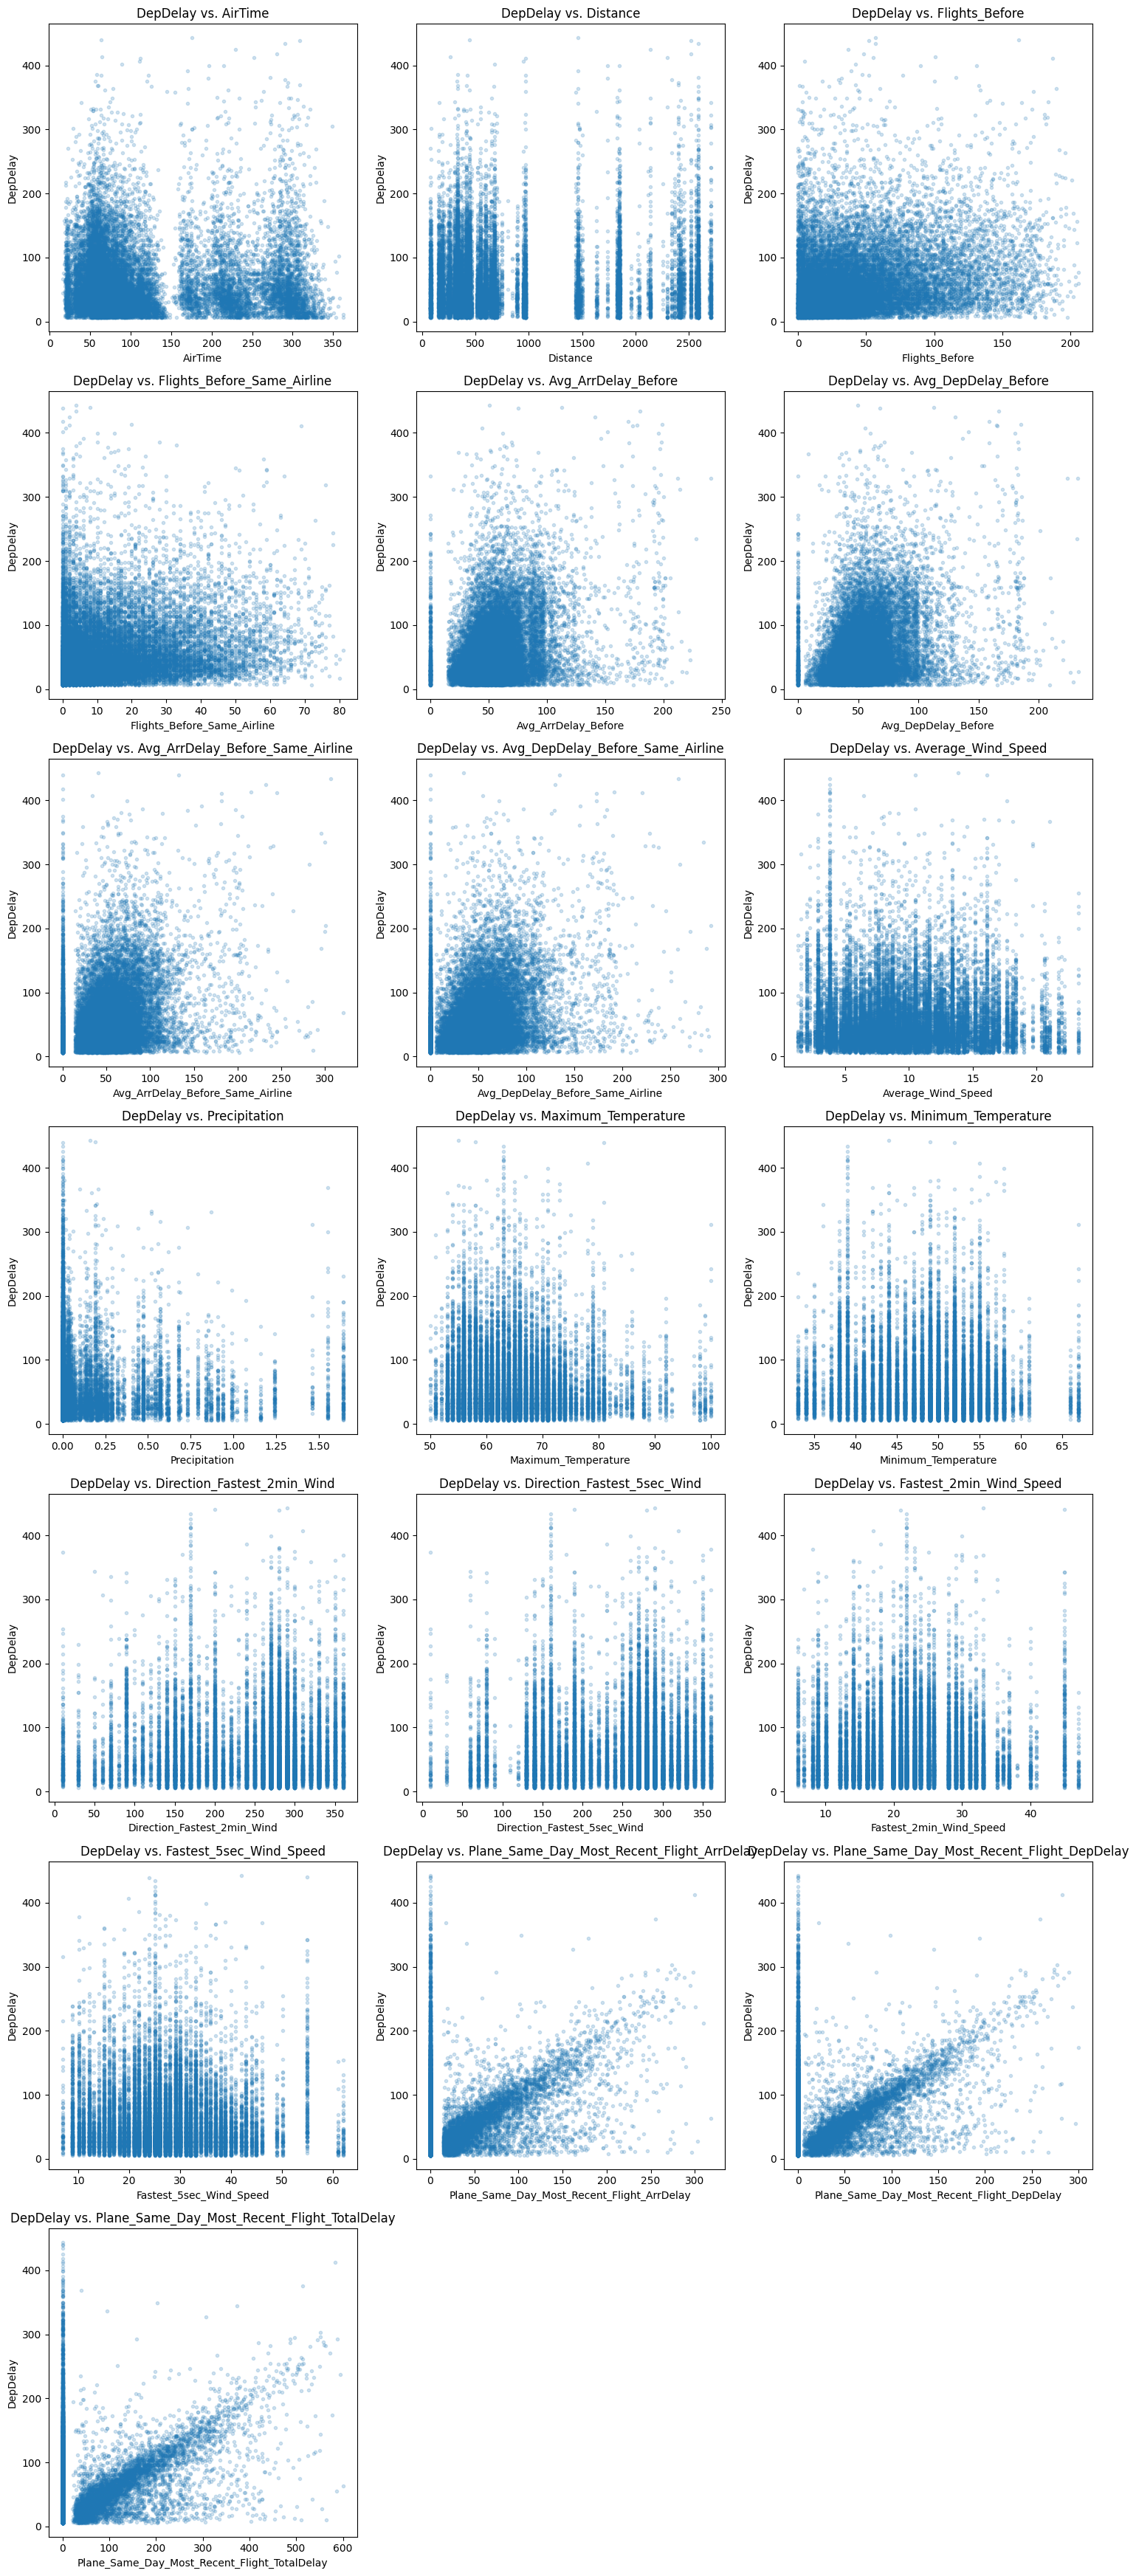

In [ ]:
import math

numeric_features = [
    'AirTime', 'Distance', 'Flights_Before', 'Flights_Before_Same_Airline',
    'Avg_ArrDelay_Before', 'Avg_DepDelay_Before', 'Avg_ArrDelay_Before_Same_Airline',
    'Avg_DepDelay_Before_Same_Airline', 'Average_Wind_Speed', 'Precipitation',
    'Maximum_Temperature', 'Minimum_Temperature', 'Direction_Fastest_2min_Wind',
    'Direction_Fastest_5sec_Wind', 'Fastest_2min_Wind_Speed', 'Fastest_5sec_Wind_Speed',
    'Plane_Same_Day_Most_Recent_Flight_ArrDelay', 'Plane_Same_Day_Most_Recent_Flight_DepDelay',
    'Plane_Same_Day_Most_Recent_Flight_TotalDelay'
]

num_features = len(numeric_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
axes = axes.ravel()

for idx, feature in enumerate(numeric_features):
    axes[idx].scatter(modeling_data_less_outliers[feature], modeling_data_less_outliers['DepDelay'], alpha=0.2, marker='.')
    axes[idx].set_title(f'DepDelay vs. {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('DepDelay')

for idx in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [ ]:
def remove_zero_outliers(data, features):
    for feature in features:
        data = data[data[feature] != 0]
    return data

flight_features = ['AirTime', 'Distance', 'Flights_Before', 'Flights_Before_Same_Airline',
                    'Avg_ArrDelay_Before', 'Avg_DepDelay_Before',
                    'Avg_ArrDelay_Before_Same_Airline', 'Avg_DepDelay_Before_Same_Airline']

modeling_data_less_outliers = remove_zero_outliers(modeling_data_less_outliers, flight_features)
print(modeling_data_less_outliers.shape)

(20259, 27)


In [ ]:
nan_counts = modeling_data_less_outliers.isna().sum()
print(nan_counts)

DayOfWeek                                       0
Airline                                         0
AirTime                                         0
DepDelay                                        0
Origin                                          0
Distance                                        0
DepHour                                         0
Month                                           0
Same_Day_Num_Flights_of_this_Plane              0
TotalDelay                                      0
Plane_Same_Day_Most_Recent_Flight_ArrDelay      0
Plane_Same_Day_Most_Recent_Flight_DepDelay      0
Plane_Same_Day_Most_Recent_Flight_TotalDelay    0
Flights_Before                                  0
Flights_Before_Same_Airline                     0
Avg_ArrDelay_Before                             0
Avg_DepDelay_Before                             0
Avg_ArrDelay_Before_Same_Airline                0
Avg_DepDelay_Before_Same_Airline                0
Average_Wind_Speed                              0


In [ ]:
categorical_features = ['DayOfWeek', 'Airline', 'Origin', 'DepHour', 'Month']
modeling_data = pd.get_dummies(modeling_data_less_outliers, columns=categorical_features)
print(modeling_data.shape)
print(modeling_data.head())

(20259, 71)
   AirTime  DepDelay  Distance  Same_Day_Num_Flights_of_this_Plane  \
1      216        19      1835                                   1   
4       65        25       371                                   2   
5       64        25       407                                   2   
6      220        16      1844                                   2   
7       90        10       671                                   3   

   TotalDelay  Plane_Same_Day_Most_Recent_Flight_ArrDelay  \
1          35                                         0.0   
4          49                                         0.0   
5          44                                         0.0   
6          39                                         0.0   
7          31                                        87.0   

   Plane_Same_Day_Most_Recent_Flight_DepDelay  \
1                                         0.0   
4                                         0.0   
5                                         0.0   
6   

In [ ]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(modeling_data, test_size=0.4, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print("Training Set Shape:", train_data.shape)
print("Validation Set Shape:", validation_data.shape)
print("Test Set Shape:", test_data.shape)

Training Set Shape: (12155, 71)
Validation Set Shape: (4052, 71)
Test Set Shape: (4052, 71)


In [ ]:
correlation_matrix = train_data.corr()
dep_delay_correlations = correlation_matrix['DepDelay']
dep_delay_correlations.sort_values(ascending=False)

pd.set_option('display.max_rows', None)
print(dep_delay_correlations.sort_values(ascending=False))
pd.reset_option('display.max_rows')

DepDelay                                        1.000000
TotalDelay                                      0.992432
Avg_DepDelay_Before                             0.345164
Avg_ArrDelay_Before                             0.338409
Avg_ArrDelay_Before_Same_Airline                0.336526
Avg_DepDelay_Before_Same_Airline                0.335940
Flights_Before                                  0.294110
Plane_Same_Day_Most_Recent_Flight_DepDelay      0.288523
Plane_Same_Day_Most_Recent_Flight_TotalDelay    0.288033
Plane_Same_Day_Most_Recent_Flight_ArrDelay      0.285426
Flights_Before_Same_Airline                     0.193946
Origin_SFO                                      0.175389
Same_Day_Num_Flights_of_this_Plane              0.140925
Month_1                                         0.128800
DepHour_0                                       0.088616
DepHour_1                                       0.086447
DepHour_23                                      0.078319
Airline_American Airlines Inc. 

In [ ]:
train_data.drop(['TotalDelay'], axis=1, inplace=True)
validation_data.drop(['TotalDelay'], axis=1, inplace=True)
test_data.drop(['TotalDelay'], axis=1, inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_numeric = train_data[numeric_features]
X_numeric = add_constant(X_numeric)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
pd.set_option('display.max_rows', None)
print(vif_data)

                                         Feature         VIF
0                                          const  118.056769
1                                        AirTime   62.495651
2                                       Distance   62.521586
3                                 Flights_Before    2.403590
4                    Flights_Before_Same_Airline    1.931827
5                            Avg_ArrDelay_Before   35.945307
6                            Avg_DepDelay_Before   35.239579
7               Avg_ArrDelay_Before_Same_Airline   26.811215
8               Avg_DepDelay_Before_Same_Airline   26.241141
9                             Average_Wind_Speed    4.497150
10                                 Precipitation    1.553839
11                           Maximum_Temperature    2.286984
12                           Minimum_Temperature    2.447970
13                   Direction_Fastest_2min_Wind    3.679891
14                   Direction_Fastest_5sec_Wind    3.732849
15                      

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
vif_kept_features = numeric_features.copy()
vif_kept_features.remove('Plane_Same_Day_Most_Recent_Flight_TotalDelay')
vif_kept_features.remove('Plane_Same_Day_Most_Recent_Flight_ArrDelay')
vif_kept_features.remove('Fastest_5sec_Wind_Speed')
vif_kept_features.remove('Direction_Fastest_2min_Wind')
vif_kept_features.remove('Fastest_2min_Wind_Speed')
vif_kept_features.remove('Avg_ArrDelay_Before')
vif_kept_features.remove('AirTime')
vif_kept_features.remove('Avg_ArrDelay_Before_Same_Airline')

removed_features_due_to_vif = [
    'Plane_Same_Day_Most_Recent_Flight_TotalDelay',
    'Plane_Same_Day_Most_Recent_Flight_ArrDelay',
    'Fastest_5sec_Wind_Speed',
    'Direction_Fastest_2min_Wind',
    'Fastest_2min_Wind_Speed',
    'Avg_ArrDelay_Before',
    'AirTime',
    'Avg_ArrDelay_Before_Same_Airline'
]

In [ ]:
X_numeric = train_data[vif_kept_features]
X_numeric = add_constant(X_numeric)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
pd.set_option('display.max_rows', None)
print(vif_data)

                                       Feature         VIF
0                                        const  107.351435
1                                     Distance    1.088794
2                               Flights_Before    2.330312
3                  Flights_Before_Same_Airline    1.899415
4                          Avg_DepDelay_Before    2.569609
5             Avg_DepDelay_Before_Same_Airline    2.272588
6                           Average_Wind_Speed    1.507619
7                                Precipitation    1.382270
8                          Maximum_Temperature    2.240552
9                          Minimum_Temperature    2.373887
10                 Direction_Fastest_5sec_Wind    1.299229
11  Plane_Same_Day_Most_Recent_Flight_DepDelay    1.075476


In [ ]:
train_data.drop(columns=removed_features_due_to_vif, inplace=True)
validation_data.drop(columns=removed_features_due_to_vif, inplace=True)
test_data.drop(columns=removed_features_due_to_vif, inplace=True)
print(train_data.head())

       DepDelay  Distance  Same_Day_Num_Flights_of_this_Plane  \
21559        33       621                                   2   
3527        103       353                                   4   
18804        54       329                                   4   
1686         43       386                                   3   
11928        96       550                                   6   

       Plane_Same_Day_Most_Recent_Flight_DepDelay  Flights_Before  \
21559                                         0.0               5   
3527                                         73.0              33   
18804                                        58.0              71   
1686                                          0.0              20   
11928                                         0.0             163   

       Flights_Before_Same_Airline  Avg_DepDelay_Before  \
21559                            2            65.400000   
3527                             1            56.393939   
18804            

### Linear Regression Modeling

In [ ]:
for column in train_data.columns:
    train_data[column] = pd.to_numeric(train_data[column], errors='coerce')

bool_columns = train_data.select_dtypes(include=['bool']).columns
train_data[bool_columns] = train_data[bool_columns].astype(int)
print(train_data.dtypes)

DepDelay                                        int64
Distance                                        int64
Same_Day_Num_Flights_of_this_Plane              int64
Plane_Same_Day_Most_Recent_Flight_DepDelay    float64
Flights_Before                                  int64
Flights_Before_Same_Airline                     int64
Avg_DepDelay_Before                           float64
Avg_DepDelay_Before_Same_Airline              float64
Average_Wind_Speed                            float64
Precipitation                                 float64
Maximum_Temperature                           float64
Minimum_Temperature                           float64
Direction_Fastest_5sec_Wind                   float64
DayOfWeek_Friday                                int64
DayOfWeek_Monday                                int64
DayOfWeek_Saturday                              int64
DayOfWeek_Sunday                                int64
DayOfWeek_Thursday                              int64
DayOfWeek_Tuesday           

In [ ]:
import statsmodels.api as sm

columns_to_drop = ['DayOfWeek_Monday', 'Airline_Delta Air Lines Inc.', 'Origin_OAK', 'DepHour_0', 'Month_1']
X_train_lin_reg = train_data.drop(['DepDelay'] + columns_to_drop, axis=1)
X_train_lin_reg = sm.add_constant(X_train_lin_reg)
y_train_lin_reg = train_data['DepDelay']

model = sm.OLS(y_train_lin_reg, X_train_lin_reg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               DepDelay   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     73.51
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:05:19   Log-Likelihood:                -63038.
No. Observations:               12155   AIC:                         1.262e+05
Df Residuals:                   12098   BIC:                         1.266e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

### Regression Tree

Best ccp_alpha: 0.0095
Best estimator: DecisionTreeRegressor(ccp_alpha=0.0095, random_state=0)


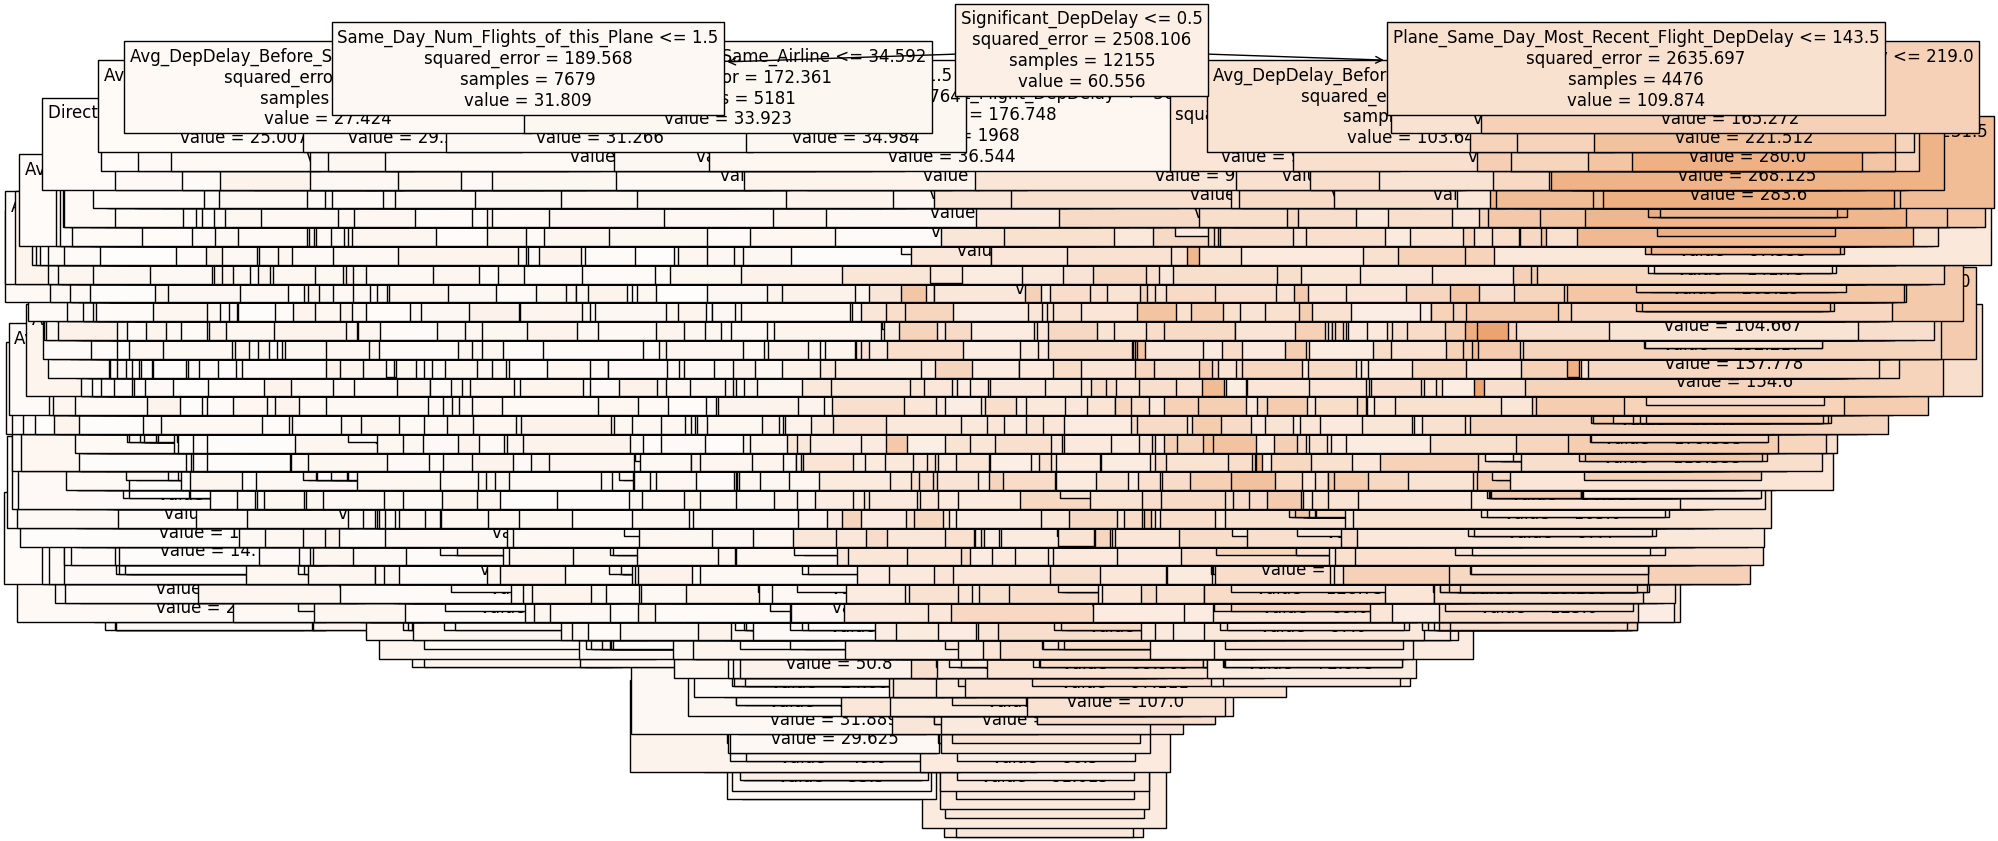

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV

X_train_reg_tree = train_data.drop('DepDelay', axis=1)
y_train_reg_tree = train_data['DepDelay']

tree_model = DecisionTreeRegressor(random_state=0)
param_grid = {'ccp_alpha': np.linspace(0.0001, 0.01, 100)}
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_reg_tree, y_train_reg_tree)

print("Best ccp_alpha:", grid_search.best_params_['ccp_alpha'])
print("Best estimator:", grid_search.best_estimator_)
feature_names = X_train_reg_tree.columns
plt.figure(figsize=(20, 10))
plot_tree(grid_search.best_estimator_, filled=True, feature_names=feature_names, fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

X_val_reg_tree = validation_data.drop(['DepDelay'], axis=1)
y_val_reg_tree = validation_data['DepDelay']
tree_predictions = grid_search.best_estimator_.predict(X_val_reg_tree)
tree_OSR2 = r2_score(y_val_reg_tree, tree_predictions)
tree_MAE = mean_absolute_error(y_val_reg_tree, tree_predictions)
print(f"Decision Tree OSR2 (using the original feature data): {tree_OSR2:.4f}")
print(f"Decision Tree MAE (using the original feature data): {tree_MAE:.4f}")

Decision Tree OSR2 (using the original feature data): 0.3196
Decision Tree MAE (using the original feature data): 23.2619


### Switching to Classification Problem

Since the regression output is not ideal, let's switch gear a bit to predict whether a flight would be significant delay (more than an hour). This might still be useful as travels can plan their time arriving at the airport more wisely.

### Logistic Regression

In [ ]:
train_data['Significant_DepDelay'] = (train_data['DepDelay'] >= 60).astype(int)
validation_data['Significant_DepDelay'] = (validation_data['DepDelay'] >= 60).astype(int)
test_data['Significant_DepDelay'] = (test_data['DepDelay'] >= 60).astype(int)

In [ ]:
X_train_log_reg = X_train_lin_reg.copy()
y_train_log_reg = train_data['Significant_DepDelay']
model = sm.Logit(y_train_log_reg, X_train_log_reg)
result = model.fit_regularized(method='l1', alpha=0.01)
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5570928373218673
            Iterations: 970
            Function evaluations: 995
            Gradient evaluations: 970
                            Logit Regression Results                            
Dep. Variable:     Significant_DepDelay   No. Observations:                12155
Model:                            Logit   Df Residuals:                    12098
Method:                             MLE   Df Model:                           56
Date:                  Thu, 25 Apr 2024   Pseudo R-squ.:                  0.1534
Time:                          10:20:07   Log-Likelihood:                -6770.9
converged:                         True   LL-Null:                       -7998.2
Covariance Type:              nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 36 out of 57 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X_val_log_reg = validation_data.drop(['DepDelay', 'Significant_DepDelay'] + columns_to_drop, axis=1)
X_val_log_reg = sm.add_constant(X_val_log_reg)
y_val_log_reg = validation_data['Significant_DepDelay']
X_val_log_reg.fillna(0, inplace=True)
X_val_log_reg = X_val_log_reg.astype(float)

val_predictions_log_reg = result.predict(X_val_log_reg) > 0.5
accuracy_log_reg = accuracy_score(y_val_log_reg, val_predictions_log_reg)
precision_log_reg = precision_score(y_val_log_reg, val_predictions_log_reg)
recall_log_reg = recall_score(y_val_log_reg, val_predictions_log_reg)
f1_log_reg = f1_score(y_val_log_reg, val_predictions_log_reg)
conf_matrix_log_reg = confusion_matrix(y_val_log_reg, val_predictions_log_reg)

print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1 Score: {f1_log_reg:.4f}")
print("Confusion Matrix:")
print(conf_matrix_log_reg)

Accuracy: 0.7229
Precision: 0.6825
Recall: 0.4166
F1 Score: 0.5174
Confusion Matrix:
[[2327  280]
 [ 843  602]]


### Classification Tree

Best ccp_alpha: 0.0007000000000000001
Best estimator: DecisionTreeClassifier(ccp_alpha=0.0007000000000000001, random_state=0)


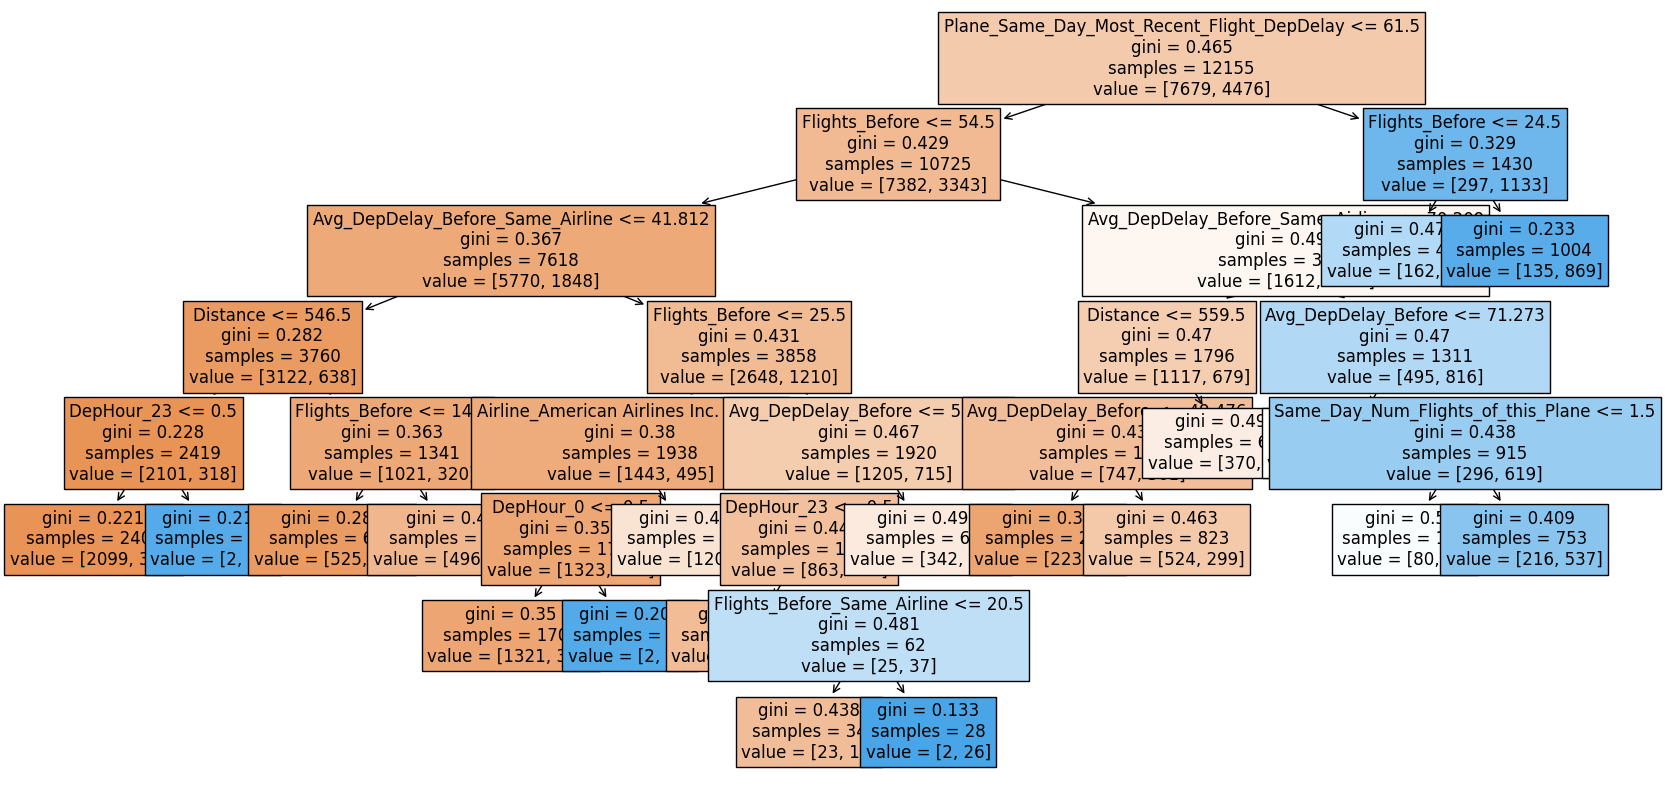

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X_train_class_tree = train_data.drop(['DepDelay', 'Significant_DepDelay'], axis=1)
y_train_class_tree = train_data['Significant_DepDelay']

class_tree_model = DecisionTreeClassifier(random_state=0)
param_grid = {'ccp_alpha': np.linspace(0.0001, 0.01, 100)}
grid_search_class_tree = GridSearchCV(estimator=class_tree_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_class_tree.fit(X_train_class_tree, y_train_class_tree)

print("Best ccp_alpha:", grid_search_class_tree.best_params_['ccp_alpha'])
print("Best estimator:", grid_search_class_tree.best_estimator_)

feature_names = X_train_class_tree.columns
plt.figure(figsize=(20, 10))
plot_tree(grid_search_class_tree.best_estimator_, filled=True, feature_names=feature_names, fontsize=12)
plt.show()

In [ ]:
X_val_class_tree = X_val_reg_tree.drop('Significant_DepDelay', axis=1)
y_val_class_tree = validation_data['Significant_DepDelay']
class_tree_predictions = grid_search_class_tree.best_estimator_.predict(X_val_class_tree)

accuracy_class_tree = accuracy_score(y_val_class_tree, class_tree_predictions)
precision_class_tree = precision_score(y_val_class_tree, class_tree_predictions)
recall_class_tree = recall_score(y_val_class_tree, class_tree_predictions)
f1_class_tree = f1_score(y_val_class_tree, class_tree_predictions)
conf_matrix_class_tree = confusion_matrix(y_val_class_tree, class_tree_predictions)

print(f"Accuracy: {accuracy_class_tree:.4f}")
print(f"Precision: {precision_class_tree:.4f}")
print(f"Recall: {recall_class_tree:.4f}")
print(f"F1 Score: {f1_class_tree:.4f}")
print("Confusion Matrix:")
print(conf_matrix_class_tree)

Accuracy: 0.7337
Precision: 0.7535
Recall: 0.3765
F1 Score: 0.5021
Confusion Matrix:
[[2429  178]
 [ 901  544]]


In [ ]:
X_test_class_tree = test_data.drop(['DepDelay', 'Significant_DepDelay'], axis=1)
y_test_class_tree = test_data['Significant_DepDelay']

test_tree_predictions = grid_search_class_tree.best_estimator_.predict(X_test_class_tree)

accuracy_test_tree = accuracy_score(y_test_class_tree, test_tree_predictions)
precision_test_tree = precision_score(y_test_class_tree, test_tree_predictions)
recall_test_tree = recall_score(y_test_class_tree, test_tree_predictions)
f1_test_tree = f1_score(y_test_class_tree, test_tree_predictions)
conf_matrix_test_tree = confusion_matrix(y_test_class_tree, test_tree_predictions)

print(f"Accuracy: {accuracy_test_tree:.4f}")
print(f"Precision: {precision_test_tree:.4f}")
print(f"Recall: {recall_test_tree:.4f}")
print(f"F1 Score: {f1_test_tree:.4f}")
print("Confusion Matrix:")
print(conf_matrix_test_tree)

Accuracy: 0.7330
Precision: 0.7456
Recall: 0.4007
F1 Score: 0.5212
Confusion Matrix:
[[2381  201]
 [ 881  589]]
